## Ames Housing Data Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config Completer.use_jedi = False

In [2]:
df = pd.read_csv('./out/ames_housing_data_clean.csv')

In [3]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [5]:
df.isnull().sum().sort_values()

Lot Frontage              0
Exter Qual_TA             0
Exter Cond_Fa             0
Exter Cond_Gd             0
Exter Cond_Po             0
                         ..
Neighborhood_NoRidge      0
Neighborhood_NWAmes       0
Neighborhood_NPkVill      0
Neighborhood_Sawyer       0
Sale Condition_Partial    0
Length: 274, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 274 entries, Lot Frontage to Sale Condition_Partial
dtypes: float64(11), int64(263)
memory usage: 6.1 MB


Split the data for training and testing:

In [9]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

Scale the features using the standard scaler (we do not need to scale the targets):

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
X_train_scaled = scaler.fit_transform(X_train)

In [13]:
X_test_scaled = scaler.transform(X_test)

### Linear Regression Model using Elastic Net

Ridge + Lasso Regression

In [16]:
from sklearn.linear_model import ElasticNet

In [17]:
base_model = ElasticNet()

In [20]:
alpha_values = []

for n in range(-8, 12, 1):
    alpha = 2 ** n
    alpha_values.append(alpha)

len(alpha_values)

20

In [21]:
l1_ratio_values = [.1, .25, .5, .75, .9, .95, .99, 1.0]

In [22]:
param_grid = {'alpha': alpha_values,
              'l1_ratio': l1_ratio_values}

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
grid = GridSearchCV(estimator=base_model,
                    param_grid=param_grid,
                    scoring='neg_mean_squared_error',
                    cv=10,
                    verbose=2)

In [25]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 509166192574.9001, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.1; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502366777631.58453, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 531392006557.76355, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 494513790759.6912, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 536745032067.8722, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 534901568271.2617, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 527456189811.5332, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 539167527275.2892, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.1; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504910992609.9161, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.1; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 523876510752.40656, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.1; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 498580681727.99207, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.25; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492165185495.43475, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 520111731002.4021, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483741262394.62897, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 525567067403.8944, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 524131516176.0194, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516632349444.5061, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 527948936254.38727, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 493927296894.87445, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512960332327.84467, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474363563291.51215, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469096651156.1308, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 494306394869.39575, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459102183079.2947, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 500145474259.5989, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499588032554.94775, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.5; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491780851526.7727, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502501973555.07526, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469071008637.08136, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.5; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488321126548.5672, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.5; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466067770333.7295, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.75; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456400023316.26587, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.75; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 485889023297.7565, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.75; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450727600752.19824, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.75; total time=   1.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 490400707828.70844, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.75; total time=   1.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488390669271.54047, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.75; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 485912750038.8277, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.75; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492907773116.8855, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.75; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461430143326.3306, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.75; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483714970125.8636, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.75; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453363840471.7664, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446488624549.3567, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470420316501.61127, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 439859160802.15796, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 477190670086.8156, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 478729975682.2848, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.9; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472458664171.2603, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.9; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479582455948.14, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.9; total time=   1.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450972285643.76794, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.9; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468812314126.88184, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=0.9; total time=   1.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 444592003713.05963, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.95; total time=   1.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437757157381.7728, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.95; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460647372624.30994, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.95; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430977726155.25604, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 467818907816.3107, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470168423551.4253, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.95; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 463772563103.3823, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470426558665.4658, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.95; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 442718411287.7741, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461000615007.855, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.95; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434174214165.51575, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.99; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427517455134.7368, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.99; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 449294345271.6191, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.99; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420165664917.23047, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.99; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457233560281.43353, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.99; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460539047422.1021, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.99; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453945635604.1146, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.99; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459727067633.26074, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.99; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433144208020.3387, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.99; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452072742044.57153, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ....................alpha=0.00390625, l1_ratio=0.99; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429936038669.7533, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=1.0; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423444869018.85126, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=1.0; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 444914321247.7323, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=1.0; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415633774976.33594, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=1.0; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453037760807.08405, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=1.0; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456961762887.52576, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450111556846.20776, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=1.0; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455408188145.81805, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=1.0; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429636858432.41284, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=1.0; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448100566534.5806, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.00390625, l1_ratio=1.0; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 540221210215.9739, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 533546652251.6856, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564372568934.376, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.1; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 525566210166.56244, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 570131734724.7104, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 566898647155.9966, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.1; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 558812547153.7832, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.1; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 572781218415.1079, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.1; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 536812615475.4112, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 556994004227.3323, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 527426450986.8428, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.25; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 521118424803.6441, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 550823468619.6967, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512373801003.886, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 556542029723.9119, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553705114336.4583, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 545661309759.2561, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 559112694818.0819, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 523190993665.8856, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 543487435790.7797, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 498572383220.5494, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.5; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 493374818334.6439, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 520229195188.4233, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.5; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482699733044.7893, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526064482342.48145, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.5; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 524169285303.9208, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 515958292899.0818, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 528495395132.84705, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492748992493.3037, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 513402856591.5143, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 443578171265.5221, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 441629195933.83057, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461964583055.9551, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 426265664710.1539, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468610679662.538, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468351594804.1077, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458939943753.0079, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471032195143.18713, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 435880255457.8605, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457336950467.3803, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465075771004.5381, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457971363934.5292, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483381243606.8483, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451346280425.36456, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.9; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 489385374197.1121, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 490128902582.5777, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483920879003.2758, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492193926435.0845, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461880556838.6851, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479855585885.8917, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453370683080.2823, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446494828508.3374, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 470428867514.3933, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 439866125437.9001, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 477196851318.6376, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 478733405991.6732, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472465756905.4838, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479592663285.0963, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450975961811.95306, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468822413455.0542, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437370484581.59875, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.99; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430619224262.3401, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.99; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452710463864.18445, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.99; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423504409475.20776, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.99; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460474177112.78845, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.99; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 463390818728.11865, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.99; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456926302328.2106, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.99; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462979030538.1038, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.99; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 436008063619.3245, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.99; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 454804707474.2283, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .....................alpha=0.0078125, l1_ratio=0.99; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429967547242.1205, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423475842011.7492, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=1.0; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 444946151216.9259, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415666115911.011, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453069484641.2306, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456990448788.4757, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=1.0; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450141042518.11035, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455439401601.5059, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429663774016.2293, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448124269764.02203, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.0078125, l1_ratio=1.0; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 579735164811.0425, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 573264152832.6658, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 605817918304.898, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 565677876863.7996, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 612641048899.8468, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 608302620876.8699, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 599112704502.9954, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 615573095586.5239, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 578182763290.8519, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 599815814563.1036, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564299881718.4789, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 558199097806.6998, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 589580479041.6562, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549614693164.16956, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 596207754529.6527, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 592161431756.2739, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 583194156757.9486, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 599053520776.488, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 561525581195.7118, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 583356585625.2904, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 529838103879.67206, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 524840417383.0074, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553224890664.2793, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 513767149753.7031, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 559648005897.4005, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 556402789380.2313, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547598498112.7702, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 562289192728.6323, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 524435142225.7781, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 546868009583.4437, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466020628346.6291, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464237250901.67426, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 485775309652.65204, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 447623065194.9241, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 492609553069.8411, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.75; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491077583744.2445, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.75; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481377646880.9209, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.75; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 494985765738.44244, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456728161517.41327, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480610697094.8515, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352770156452.22034, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.9; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359451398871.6917, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.9; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 366532610592.5558, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330913874971.66974, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.9; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375210586981.069, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 376100148785.5646, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362429277571.6432, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377797724697.76495, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 340260464961.7137, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.9; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 365812609963.28406, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464058371034.10364, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456750937238.88513, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482202639646.5005, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450216341745.2577, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488073030606.35474, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.95; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488825736580.4015, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.95; total time=   1.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482922465332.266, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.95; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491427695744.9377, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.95; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460777017663.9385, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.95; total time=   1.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479131679740.28357, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 442256706632.30316, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.99; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 435194837324.30365, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.99; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458307318851.36035, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.99; total time=   1.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 428787044310.46747, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.99; total time=   1.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465757435121.6422, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.99; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468056107374.1996, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.99; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461838811100.0478, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.99; total time=   1.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468080597657.0769, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.99; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 439914347739.10944, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.99; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459150551056.7981, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ......................alpha=0.015625, l1_ratio=0.99; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430030420557.1915, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423537648222.04486, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=1.0; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 445009693967.3187, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=1.0; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415730649516.7257, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=1.0; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453132790622.6837, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=1.0; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457047685542.8071, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=1.0; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450199897147.3736, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=1.0; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455501696283.0556, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=1.0; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429717518694.7741, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=1.0; total time=   1.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448172595582.9999, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.015625, l1_ratio=1.0; total time=   1.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 629072474328.7094, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.1; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 622743021733.8049, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 656955387951.3704, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 615979063783.5178, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 665482829624.5927, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.1; total time=   1.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 660615958618.148, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 649630442914.654, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.1; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 668656279828.1542, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 629937194727.3424, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 653116894829.8892, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.1; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 610598307591.0726, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.25; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604688809533.2474, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.25; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 637672600353.3214, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.25; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 596739906637.6198, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.25; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 645848955518.0708, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.25; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 641102253236.9198, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.25; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 630583467561.3762, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.25; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 648963600771.2725, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.25; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 609982296497.8154, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 633491390616.8704, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.25; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 569577255573.9349, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.5; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564843741394.9655, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.5; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 594656569059.6177, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.5; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553861683882.7117, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.5; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 602305216084.908, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 598034560815.3522, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.5; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 588185887787.6338, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 605238568566.7742, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 565508144440.5082, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 589949521668.4489, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 495135941041.6515, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 493675951953.7674, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516184067331.0596, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.75; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475930980596.50854, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 523785473595.1169, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 520945745072.7221, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 510866916804.2575, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526305644984.4406, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 485001596015.76465, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511766466096.3729, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 368876797771.57983, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375824127796.3858, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383100138683.03625, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 344852598198.1587, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.9; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 392303656675.6934, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.9; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 392173026990.1106, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378491038954.91296, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.9; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 394523355929.1159, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352132680635.87756, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 382340251921.5934, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=0.9; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232068359618.6152, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248910633736.07736, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239513006351.7306, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205253760749.49463, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250525237031.1174, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252487720611.4409, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.95; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233713641659.34595, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.95; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252988115082.71912, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213695711459.1568, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.95; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243658796715.82608, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450270551189.3593, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.99; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 443407626020.9947, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.99; total time=   1.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466965134481.24194, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.99; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 436751323698.4682, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.99; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473914079992.1536, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.99; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475677475085.2612, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.99; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469427095579.0925, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.99; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476349696950.8335, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.99; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448056238935.1458, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.99; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466035660129.0528, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .......................alpha=0.03125, l1_ratio=0.99; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430155646188.2984, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423660701820.04877, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 445136309426.7778, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415859125078.40717, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=1.0; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453258834793.8232, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457161617060.7066, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=1.0; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450317139083.08887, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=1.0; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455625753739.98474, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429824661208.636, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448272743528.42664, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.03125, l1_ratio=1.0; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 689456975934.175, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 682968445212.7666, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 718810617777.3191, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 677180347319.4805, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 729670405186.7612, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 725029581452.3713, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 711364768647.4813, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 733041038742.5542, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 692735752770.8308, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 717316017077.3137, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 667546912848.7539, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 661595502382.4424, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 696144845908.513, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 654515466471.1329, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 706484069509.3304, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 701760349124.5903, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 688860659922.967, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 709813697988.748, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 669210702128.9, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 694340997254.0732, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 619070183702.8643, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 614499584468.2002, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 645683115824.7838, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 603999956112.5522, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.5; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 655151571655.1803, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.5; total time=   2.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 650471605672.0446, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 638885909511.4124, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 658368183300.9685, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.5; total time=   1.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 616765756100.6866, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.5; total time=   1.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 643313425162.8873, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.5; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 532274097419.71106, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.75; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 531201453313.01624, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.75; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 554516173622.991, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.75; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512733192901.69403, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.75; total time=   1.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 563475992134.6257, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.75; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 559630901682.1583, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 548832276522.73315, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 566307652035.2612, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 522098372746.5699, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 551999639910.4609, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390072606691.5424, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.9; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397591463292.7644, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.9; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404520536039.74585, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.9; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 363662617270.7252, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414781932363.2978, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413473745836.8563, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.9; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399926663844.08655, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 416845408061.59436, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.9; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 369152691283.7971, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404846476712.5153, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241899478687.19122, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259164187792.8947, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248669679595.82928, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211799947705.5711, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260788079888.34064, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262019695239.29657, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243545355980.07764, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262524416551.98126, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216684731715.5551, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253830893955.5704, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458493984400.21735, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.99; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451646337419.0282, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.99; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474054424955.2153, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.99; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 444957123173.9131, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.99; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480730399445.5089, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.99; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483606284047.7597, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.99; total time=   1.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476142175128.26965, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.99; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 486297312496.4526, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.99; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455843784629.09485, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.99; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464794721245.45526, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ........................alpha=0.0625, l1_ratio=0.99; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430404063137.9924, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423904760929.84753, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=1.0; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 445387683753.244, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=1.0; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 416113766360.8736, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=1.0; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453508677035.7756, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457387703742.5165, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=1.0; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 450549855545.64197, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=1.0; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455871729131.378, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430037550418.35986, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448482651335.3381, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.0625, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 762225497237.9708, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 755013320082.2767, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 792530823023.6748, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 750140175355.2268, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806353910452.2991, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.1; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 802707160641.0228, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 785281330029.7343, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 810097003333.6501, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 767498576376.3539, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 793087040434.6589, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 736421661344.1516, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 729931956846.8943, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.25; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 766086473545.4445, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.25; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 723702286452.4615, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.25; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 779207595047.7422, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.25; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 775290144110.6619, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.25; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 758977918465.5721, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.25; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782851210526.1337, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.25; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 740019433620.5776, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.25; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 766458603971.7246, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 679475829252.4474, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 674723297603.047, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 707301644687.0984, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 664834249074.6613, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 719161816818.7057, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 714848981124.9695, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 700615848883.0206, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 722660452528.4502, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 678794065224.647, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 707345772787.535, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 578592984580.702, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 577788787758.7385, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 601870549120.37, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.75; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 558984487616.7327, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 612693460735.4358, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 608466890267.7515, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 596318565531.8232, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 615920493545.2183, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 568718257024.3441, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 601921252872.7988, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417662596538.386, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425885248553.3351, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 432053639993.20715, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.9; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 389050991455.0785, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 443879083231.4663, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 441514098291.99677, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 428139013718.14496, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446173444434.6724, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393054917337.1465, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434618249766.5182, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255194332769.95422, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273330224842.8344, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260825703759.58545, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221178783029.26813, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274542547594.1148, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274848233097.82556, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.95; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 257047482829.41882, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.95; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275827699068.8573, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222589908297.16095, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267968388388.58368, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................alpha=0.125, l1_ratio=0.95; total time=   1.1s
[CV] END .........................alpha=0.125, l1_ratio=0.99; total time=   1.0s
[CV] END .........................alpha=0.125, l1_ratio=0.99; total time=   0.9s
[CV] END .........................alpha=0.125, l1_ratio=0.99; total time=   1.1s
[CV] END .........................alpha=0.125, l1_ratio=0.99; total time=   0.9s
[CV] END .........................alpha=0.125, l1_ratio=0.99; total time=   1.0s
[CV] END .........................alpha=0.125, l1_ratio=0.99; total time=   1.1s
[CV] END .........................alpha=0.125, l1_ratio=0.99; total time=   1.0s
[CV] END .........................alpha=0.125, l1_ratio=0.99; total time=   0.9s
[CV] END .........................alpha=0.125, l1_ratio=0.99; total time=   0.9s
[CV] END .........................alpha=0.125, l1_ratio=0.99; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430895312565.91, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424387163055.72266, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 445886150980.6449, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=1.0; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 416618192388.2434, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 454001582169.8672, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457835142703.4682, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451011316679.33374, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456357764886.96075, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=1.0; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430457806018.5798, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=1.0; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448926048615.6094, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.125, l1_ratio=1.0; total time=   1.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 848460891770.8323, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 839727345451.3004, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.1; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 879034877586.5857, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 835800288200.2102, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.1; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 896350385322.1715, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 894269733899.3915, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 871925467124.6539, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.1; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 900933030045.6877, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.1; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 854940228645.2942, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.1; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 881155220504.9414, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.1; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 818501684612.9918, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.25; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 810739762810.3638, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.25; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 848614001462.1027, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.25; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 805343016993.7651, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.25; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 865073801022.898, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.25; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 862595598906.6835, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 841713261340.964, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 869422833622.248, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 823307135103.584, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.25; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 850682953744.2029, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.25; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 752107917531.6626, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.5; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 746583623132.5908, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 780675054996.1583, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 737268643297.6392, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 795489436011.047, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 792278572133.0408, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.5; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 774301533727.6326, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 799477193223.3812, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 752459454087.0034, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782749705496.9833, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 635109944554.0121, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 634222426436.479, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 659188340209.427, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 615246787845.8473, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 672319912804.5933, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 668504447578.2548, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 654103176407.0774, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.75; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 675993911422.1012, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 625254734541.7485, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 661846133398.7603, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452603326139.76355, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461430764733.53754, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466727507138.0364, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422036928957.4537, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480455778564.8459, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 477545214690.10986, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464033799737.93066, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483326263397.2372, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424591673814.4755, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472318626202.1411, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273106169300.7928, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292283739654.9845, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.95; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277095919729.92926, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.95; total time=   1.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235021949701.99402, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.95; total time=   1.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292781756090.5616, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.95; total time=   2.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 292193825900.70856, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.95; total time=   2.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275426345287.487, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 294231943974.01654, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233160831869.33148, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287206566758.8179, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=0.25, l1_ratio=0.95; total time=   1.5s
[CV] END ..........................alpha=0.25, l1_ratio=0.99; total time=   0.5s
[CV] END ..........................alpha=0.25, l1_ratio=0.99; total time=   0.7s
[CV] END ..........................alpha=0.25, l1_ratio=0.99; total time=   0.7s
[CV] END ..........................alpha=0.25, l1_ratio=0.99; total time=   0.9s
[CV] END ..........................alpha=0.25, l1_ratio=0.99; total time=   0.6s
[CV] END ..........................alpha=0.25, l1_ratio=0.99; total time=   0.8s
[CV] END ..........................alpha=0.25, l1_ratio=0.99; total time=   0.5s
[CV] END ..........................alpha=0.25, l1_ratio=0.99; total time=   0.5s
[CV] END ..........................alpha=0.25, l1_ratio=0.99; total time=   0.5s
[CV] END ..........................alpha=0.25, l1_ratio=0.99; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431861028589.1404, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=1.0; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425333485394.37897, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446866238615.9199, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=1.0; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417610063817.9242, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=1.0; total time=   1.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 454968786942.69183, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=1.0; total time=   2.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458711047814.5224, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=1.0; total time=   2.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451922002767.98425, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=1.0; total time=   1.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457315137749.62885, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431286020600.9769, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=1.0; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 449806452199.1234, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.25, l1_ratio=1.0; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 946557207739.0236, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 935313340103.7794, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 976579824595.3928, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 932734581946.2515, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 997607755932.2864, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 997348907494.4011, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 969222657057.9548, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1003619404843.437, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 953086692682.7045, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 979775420870.2646, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 913270312711.3358, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 903289629594.6656, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.25; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943062045662.6444, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 899056067669.181, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 963166091242.9731, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.25; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 962454150704.662, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 936023948415.5278, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 968782948308.8434, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.25; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 918075666470.0421, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.25; total time=   1.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 946296321718.0654, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 837874342040.7081, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 830766165680.6166, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 866567785634.5284, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 822176730262.9067, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 884765835386.9629, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883137763990.1495, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 860307544543.5487, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 889693309321.603, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 837508815408.5815, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 870080592189.2124, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 703041470493.6145, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 701506955152.129, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.75; total time=   1.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 727605754323.0875, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.75; total time=   1.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 682398856657.2006, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.75; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 743473878181.0006, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.75; total time=   1.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 740767842830.478, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.75; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 723040956631.8928, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 747767189421.9491, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 692372746156.5118, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.75; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 732396873761.5107, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.75; total time=   1.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 495514675000.4674, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504642103070.4933, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 509326849412.8154, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462991479045.5195, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 525093591315.28296, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   1.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 522459618531.13586, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 508034826976.6826, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 528789109889.5575, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 463724837596.3491, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 518104369810.2906, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=0.9; total time=   1.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296203593691.2118, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316256877072.67883, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   1.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298231360223.6431, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 254085637958.12433, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 315987870636.17505, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   2.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 314959570647.91547, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299213062229.16364, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   1.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318186577090.0977, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248880313658.31396, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 311993164503.11426, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=0.5, l1_ratio=0.95; total time=   1.4s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.4s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.3s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.4s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.3s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.4s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.3s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.4s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.4s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.6s
[CV] END ...........................alpha=0.5, l1_ratio=0.99; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 433730330933.6465, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=1.0; total time=   1.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427156604944.2363, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=1.0; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 448765687360.90894, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 419524238274.3714, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456828185652.02826, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460398910225.7032, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453683987224.46045, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=1.0; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459159009089.2699, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=1.0; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 432886659641.3221, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=1.0; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451600381951.76636, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=0.5, l1_ratio=1.0; total time=   1.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1048610842510.349, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1033934601349.1726, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1077270095456.1929, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1033193623323.0668, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1101762744711.2046, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1103304901373.8232, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1069252699898.1307, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1109774126628.3823, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1054003806401.359, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1081141089074.3608, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1014752862490.628, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.25; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1001565605366.7903, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1043396356392.9552, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 999060249310.7434, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1067010993966.2268, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1068101155118.9945, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1035759149634.8494, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1074472301400.769, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1018332000429.3037, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1047326384034.1896, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 934524376696.224, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 924830814638.9204, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 962587474092.5997, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 917548450629.8569, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 984259854386.0369, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 984375305282.0282, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 955937827803.3629, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 990671468604.7686, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 932632905865.8236, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 966910674415.8146, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 783323358874.3768, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 780375932472.3854, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 807955322081.966, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 761438337943.7723, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 826846815465.291, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 825628780882.97, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 803539313575.272, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 832104270637.9464, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 763946752010.9164, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 814082659043.1879, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547220199096.7223, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 556176695499.0049, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 560784232291.9912, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512483265440.9668, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 578681715986.8333, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 577022441914.8706, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 560683886559.4625, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 583290649306.1016, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 510468261218.2493, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 572247502866.4531, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324535817080.6764, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345143255221.0994, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324796095380.0847, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278409650000.5797, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 344327216471.73364, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 343745027212.99414, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328294099692.89935, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347783042582.7625, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272669742727.966, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 342255719966.2799, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=1, l1_ratio=0.95; total time=   1.1s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437242381977.19006, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430558896719.95056, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452324035550.15814, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423120393934.04913, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460308358861.49646, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=1.0; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 463546300234.1508, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=1.0; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456988420609.3662, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462620473728.8191, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=1.0; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 435462243718.1322, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=1.0; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 454925793991.78723, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=1, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1140971609431.9966, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1122546864398.9346, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1167792623823.4763, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1123636454671.3198, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.1; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1195113143815.5398, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1198224126122.399, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1158963244702.9836, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1205511292068.2537, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1144553940323.1824, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1172118964481.0378, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1110333397550.6113, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1093412022984.2579, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1137228820658.61, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1092816319771.2693, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1163796195019.9976, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1166509203655.756, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1128743063842.1575, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1173563866432.5342, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1111768455169.531, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1141562934671.8337, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1033206047395.5615, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1020048871661.2156, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1059880474740.7765, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1014654305484.8933, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1084674202118.8413, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1086460506574.9414, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1052379144585.9731, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1093108065003.6268, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1028364383681.0455, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1064511191684.7292, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 873929817379.0709, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 868575395897.1338, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 898036582225.3359, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 850666855500.6454, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 919904541707.492, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 920234521365.7854, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.75; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 893079213024.4148, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 926565979125.4722, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 849450017968.6208, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 904559172374.4161, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 608812580314.9758, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 617053795573.4592, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 622246372743.0779, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 571758548911.9285, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642273976289.2227, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 641858043064.8638, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 622696482826.7607, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 647848598924.5101, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 565097201081.3228, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 635285245590.8119, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 358540491402.7297, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 379268839297.91144, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 357455040414.6322, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308373411045.38556, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378487256528.1211, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378927700668.24, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362854926441.2284, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 383223528816.5538, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298499755226.33215, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377971235806.79895, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=2, l1_ratio=0.95; total time=   1.1s
[CV] END .............................alpha=2, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=2, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=2, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=2, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=2, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=2, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=2, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=2, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=2, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=2, l1_ratio=0.99; total time=   0.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 441113059190.32825, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434552934280.96155, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457293023924.78406, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427962850369.2126, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465489555960.88586, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459527681773.7812, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462233292018.23615, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 443695621223.0481, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430921717939.946, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459798179744.2654, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=2, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1212165520503.393, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1190547004054.888, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1237251354877.431, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1192955901931.381, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1266620572548.648, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1270906107534.4075, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1227738302964.6907, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1279322077266.3596, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.1; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1214049113524.9338, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1241949309820.9727, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1187009474352.6858, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1166695699422.8547, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1212095827567.0005, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1167590019389.6135, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1240855589653.7969, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1244838321607.9353, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1202826300105.3545, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1252992898450.6775, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1186192632474.659, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1216729871255.3787, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1120066210197.556, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1103259971049.7996, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1144934621457.8794, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1099707441851.3733, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1172181349267.6309, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1175393780153.3032, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1136437020906.6282, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182975366144.8813, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1111523717123.3613, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1149637369599.0266, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 966339373771.9608, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 957675308752.6387, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 989220069771.0261, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 941651040081.0688, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1013636368541.6494, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1015406590897.1152, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 983097461313.8596, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1022199119946.5305, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 936845053640.7701, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 995366545168.6443, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 680063134759.1902, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 686748124386.5933, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 693297416306.7053, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 641114953883.3452, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 715171163893.9463, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 715856827030.0125, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 693230225747.2539, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 721826783141.887, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 614851015756.6677, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 706277598483.1881, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399070401291.6857, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 419615598907.9148, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397355559583.2903, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345227378496.4629, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 419484976187.1392, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420926770290.25574, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 403558453958.5244, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425223773995.48773, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327197795302.9621, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 419415050045.12933, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=4, l1_ratio=0.95; total time=   1.1s
[CV] END .............................alpha=4, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=4, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=4, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=4, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=4, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=4, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=4, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=4, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=4, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=4, l1_ratio=0.99; total time=   0.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259767760411.84625, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 444320708244.6983, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466768247202.3696, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438235344124.556, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472133504924.6009, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468887546341.0093, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462405001248.69214, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 478474091829.56946, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 366512080383.0421, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429958504477.64905, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=4, l1_ratio=1.0; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1260166494825.4456, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1236416823288.7363, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1284049079412.3845, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1239548777038.1057, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1314768358865.2927, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1319790070575.1172, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1274086060117.5532, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1329220921965.3635, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1261054721393.3071, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1289043303471.4226, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1239969984719.7234, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1217256674551.7654, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1263684780514.355, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1218997605990.9023, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1293907409182.3186, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1298727051233.9338, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1253860723508.438, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1307966479096.5083, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1237977998976.6538, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.25; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1268564323039.2847, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1184706279690.8638, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1164938503887.657, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1207908954726.178, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1162612097260.946, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1236860720373.3286, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.5; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1241118106526.832, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1198577843765.6907, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1249867733392.189, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1174499017471.7522, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1212644993154.7122, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1046936453140.1165, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1034777118837.6661, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1068126324480.1344, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1020721214050.921, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1094434643198.6248, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1097438417630.7135, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1060600047042.0452, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1105245764262.463, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1014810820261.7461, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.75; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1073563860161.6099, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 755636672540.8489, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 759715202254.6177, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 768238264490.6321, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 715357245583.4799, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 791361531711.504, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 792939978104.0889, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 766496982436.4004, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 799447409333.8292, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 682030550836.7461, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 779501320749.3629, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446348836590.59143, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466066647680.87524, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 444453882593.52515, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 389961011162.4364, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 467007024693.7042, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468956638462.4498, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 449953053826.49115, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473506799901.6107, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361516777095.7379, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465696897694.2149, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   1.1s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.2s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.1s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.1s
[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7558364342.996826, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.9s
[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.7s
[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5386493314.835205, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   1.0s
[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3291737024.1483154, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   1.2s
[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.5s
[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 314522437879.0959, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290842718194.064, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1266041449252.4512, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1314161534358.6284, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1269424733079.246, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1345742823413.5737, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1351135019645.066, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1303962906149.0945, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1361251943230.2122, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1291276379060.5796, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1319361816974.8987, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1273269735309.2856, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1249283287305.4243, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1296226891032.269, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1251288063141.975, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1327359258080.0486, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1332634027736.179, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1286082541075.1743, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.25; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1342662538691.5366, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1270545610351.3313, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1301277214772.7432, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1226019561384.417, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1204431816846.7432, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1248061099052.768, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1202550837051.215, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1278061265204.067, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1282964980672.0752, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1238163658109.6494, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1292718752544.9993, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1214656678382.2366, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1252817880772.8225, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1105138623878.359, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1090213700062.7987, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1124670014545.167, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1077369736537.9739, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1152195477723.2795, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1156108885733.2273, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1115923796266.5364, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1165149857554.8745, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1071392289951.9924, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1129442844676.6643, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 823717076191.8069, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 824690779906.7432, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 835062023933.3595, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782566337221.5969, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 858803061181.0193, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 861137763984.3989, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 830959497899.034, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 868702473661.8706, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 745212139835.5641, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 843712225994.1068, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496298740887.8469, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 514097937570.4645, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 494129236785.3981, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438340732607.9385, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516146699734.26746, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 518270391666.5944, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 497228621787.6955, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 523617844242.4956, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400785565472.4646, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511970253501.902, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   1.1s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2028970789.4990234, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.9s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109282916026.2619, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=1.0; total time=   1.0s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.2s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.2s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.5s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.7s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.8s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.5s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1312319155735.8364, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287400673813.5605, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1335665463606.3596, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290630062108.209, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1367853245679.0728, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1373355876700.2104, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325407423795.6433, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1383825429734.4214, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1312731497968.46, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1341004623706.2686, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1294175785659.6162, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1269933357068.291, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1316935516269.9365, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1271622194550.4688, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1348631321717.3096, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1354090952815.3237, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.25; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1306661714141.8574, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1364575139701.6426, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290918456116.1147, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1322080902106.6572, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1248897981076.2666, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1226662654691.2065, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1270296614109.8894, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1224354676299.3079, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1300845652446.6038, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1306091008999.7983, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1260077425943.8137, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1316528699052.3792, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1236257208958.1387, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1275027906088.0505, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1138501507884.0273, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1122071991757.3223, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.75; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1156745159109.954, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1109212466685.4407, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1184854782790.2273, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1189362438206.7998, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1147105944617.3132, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1199471072624.4973, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1103136251788.105, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1160976471463.7495, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 871812066488.4838, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 870200611605.4481, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 881521206870.1951, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 829673551999.5709, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 905325663065.0779, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 908301948162.2181, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 875090580974.5358, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 917206294949.1312, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 791440145361.198, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 887579401953.1212, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 538451519114.02905, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553816103851.4664, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 535389790424.82166, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480238519292.8839, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 556182705462.7896, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 558439124660.6611, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 535079523208.01184, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564932572210.5542, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437908031095.58777, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 548472937797.00793, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   1.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=32, l1_ratio=1.0; total time=   0.1s
[CV] END ...................

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1331214950167.1404, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1307114437515.2278, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1355130604175.8113, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1309595480441.4333, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1387815131735.8992, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1393284704379.894, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1344964670448.6199, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1403831987865.7156, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1331849406002.9458, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1360576382412.5806, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1307490170174.3835, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1284285076596.848, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1330487221911.551, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1284394512789.9214, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1362479352291.8213, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1368012917860.503, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1320505598506.0215, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1378687040805.7424, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1303603733705.806, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1335672207254.5173, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.25; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1256896565207.84, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.5; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1235217285919.893, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1277958090620.6716, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1231044162745.8477, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1308590868552.9087, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1314042557358.2336, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1267596481668.5293, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1324908073261.4524, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1241881531937.2502, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1280768365016.942, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1148132239798.6382, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1131623926007.354, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1165333089223.2212, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1116933532286.4226, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1193417140411.754, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1198316805352.5688, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.75; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1155123802412.826, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1209213961604.028, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1109687690220.5654, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1169069031217.476, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 892285995664.769, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.9; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 889496096288.2913, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 900331796535.9858, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 848513055783.1135, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 923684022372.1296, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.9; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 927162816793.5024, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.9; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 891984534222.9197, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 937325958160.817, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 810426334475.4106, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 904260149056.3271, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=64, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 560546850874.6913, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 573998720468.5704, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.95; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 555934418963.7975, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.95; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502038006956.7124, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.95; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 575169314914.3192, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.95; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 577608383322.9283, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.95; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 552234811423.9426, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 585437914784.0251, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.95; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459896478067.3992, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564362472021.803, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=64, l1_ratio=0.95; total time=   1.0s
[CV] END ............................alpha=64, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=64, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=64, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=64, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=64, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=64, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=64, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=64, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=64, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=64, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=64, l1_ratio=1.0; total time=   0.1s
[CV] END ...................

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1347175470262.741, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1324880744208.1125, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1372012804349.1472, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1325029133989.8003, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1404793643471.2097, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1410443828883.353, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1362062412668.4382, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1420945263029.6787, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1347145177210.7507, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1377454330469.1167, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.1; total time=   1.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1306459848800.6626, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1284835546395.4792, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.25; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1329696254920.5718, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1281079649009.5137, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1361094123870.7812, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1367106612166.5977, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1319447575315.5808, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1378004210536.8037, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1299278231035.5938, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1334624915656.8174, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1237180154936.843, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1220866518660.0886, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.5; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1257683709908.102, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.5; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1207483638556.1907, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.5; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1287237503078.4194, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.5; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1293383767091.8342, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.5; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1246718614905.401, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.5; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1304570718295.738, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.5; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1218797457015.6875, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.5; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1262050862255.1077, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.5; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1127142780202.3933, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.75; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1112413934888.8538, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1142958532226.889, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1092072007436.3306, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1170000146578.0928, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1175415605232.7622, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.75; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1132370573924.7678, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1186999415455.9534, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1081387921117.1998, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1129658704742.8179, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877842995379.1392, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.9; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 875768103566.937, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883918209884.2812, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.9; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 830764020412.7786, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.9; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 906049778988.2336, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.9; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 910055297907.5376, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.9; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 874217187030.7834, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.9; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 921243751071.0569, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.9; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 791656578800.8044, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.9; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 886135774311.8662, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=128, l1_ratio=0.9; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 551211903497.3491, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.95; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564333454339.5198, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.95; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 544644530366.08875, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.95; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491178914878.55896, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.95; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 561871529919.1771, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.95; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564673508287.0221, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 538019430399.6575, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 573658143366.0413, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.95; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 451787567265.26514, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.95; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549249707741.2693, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=128, l1_ratio=0.95; total time=   0.9s
[CV] END ...........................alpha=128, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=128, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=128, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=128, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=128, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=128, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=128, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=128, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=128, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=128, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=128, l1_ratio=1.0; total time=   0.0s
[CV] END ...................

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1290260651526.0068, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1271351246882.8972, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1314657426335.8972, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1253880686129.594, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1340860128162.3936, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.1; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1351266641288.181, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1303893275851.2896, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1364225846544.265, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1278529097047.5317, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1318205248077.221, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.1; total time=   1.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1178716077883.2878, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.25; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1161703474963.8699, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.25; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1199195276178.1487, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1129867768270.7512, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.25; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1220221823865.1272, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.25; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1233099526081.0918, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.25; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1187377019954.7908, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.25; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1247834478281.63, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1149876232024.9329, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.25; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1200995747718.1145, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.25; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1099663947432.3962, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.5; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1082419948860.0007, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.5; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1116422159844.1104, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.5; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1049463239630.7396, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.5; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1137590170356.9949, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.5; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1148737211654.4675, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.5; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1103872283603.6257, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.5; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1162602408201.1475, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.5; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1059763209609.5735, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.5; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1118171483121.0112, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.5; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 999139265215.7021, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.75; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1018626256960.7924, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1012019816029.5354, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 949247484899.6052, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.75; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1033994336986.3292, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1042732901862.0173, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.75; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 995983110744.6583, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.75; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1054361098102.8345, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.75; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 961755090006.2151, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.75; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1015697769625.2007, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.75; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 803739977673.9758, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.9; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 805339811646.3845, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.9; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806378211560.6658, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.9; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 748689122967.3988, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.9; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 825443350539.8945, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.9; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 830532716151.263, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.9; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 795706010672.0544, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.9; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 842782061798.9653, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.9; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 706027779339.7352, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.9; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806748541028.4873, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=256, l1_ratio=0.9; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491766612284.67346, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.95; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 506765048939.9115, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.95; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482358812023.10034, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.95; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427583389614.5925, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.95; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496529409432.75964, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.95; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 500087205659.3573, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.95; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473767947189.5973, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.95; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 509984891017.099, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.95; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391927445821.17114, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.95; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484052690786.8799, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=256, l1_ratio=0.95; total time=   0.8s
[CV] END ...........................alpha=256, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=256, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=256, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=256, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=256, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=256, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=256, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=256, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=256, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=256, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=256, l1_ratio=1.0; total time=   0.0s
[CV] END ...................

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1727657320.7270508, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.1; total time=   0.9s
[CV] END ............................alpha=512, l1_ratio=0.1; total time=   0.9s
[CV] END ............................alpha=512, l1_ratio=0.1; total time=   1.0s
[CV] END ............................alpha=512, l1_ratio=0.1; total time=   0.9s
[CV] END ............................alpha=512, l1_ratio=0.1; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1903347693.5810547, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.1; total time=   1.0s
[CV] END ............................alpha=512, l1_ratio=0.1; total time=   0.9s
[CV] END ............................alpha=512, l1_ratio=0.1; total time=   0.9s
[CV] END ...........................alpha=512, l1_ratio=0.25; total time=   0.8s
[CV] END ...........................alpha=512, l1_ratio=0.25; total time=   0.7s
[CV] END ...........................alpha=512, l1_ratio=0.25; total time=   0.8s
[CV] END ...........................alpha=512, l1_ratio=0.25; total time=   0.8s
[CV] END ...........................alpha=512, l1_ratio=0.25; total time=   0.9s
[CV] END ...........................alpha=512, l1_ratio=0.25; total time=   0.9s
[CV] END ...........................alpha=512, l1_ratio=0.25; total time=   0.8s
[CV] END ...........................alpha=512, l1_ratio=0.25; total time=   0.8s
[CV] END ...........................alpha=512, l1_ratio=0.25; total time=   0.8s
[CV] END ...................

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1609042058.6816406, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.5; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1682956230.9643555, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.5; total time=   0.7s
[CV] END ............................alpha=512, l1_ratio=0.5; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1651604150.9179688, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.5; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1841704829.5283203, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.5; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1671646836.0249023, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.5; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1800353312.0498047, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.5; total time=   0.8s
[CV] END ............................alpha=512, l1_ratio=0.5; total time=   0.7s
[CV] END ............................alpha=512, l1_ratio=0.5; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469459881032.03455, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.75; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 436772120121.05786, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.75; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469580834084.32544, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.75; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354939040167.44604, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.75; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461680183537.4375, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.75; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488279922683.43384, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.75; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 444188854394.45825, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.75; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 507805800051.6853, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.75; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400556880149.70044, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.75; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465585713478.7666, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.75; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429602656767.53784, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.9; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 582860644673.9719, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.9; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 474088016671.2527, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.9; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390703017378.78516, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.9; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484425031619.53125, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.9; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484839705531.2024, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.9; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483336231444.12146, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.9; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491615571482.91064, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.9; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 447145631862.42114, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.9; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 452110215611.5708, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=512, l1_ratio=0.9; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 332084129751.1177, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.95; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351951972145.06934, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.95; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317876876364.0232, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.95; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259921127416.3977, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.95; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325955414596.9343, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.95; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 331434457273.5205, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.95; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 308359694845.0554, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.95; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 341903655535.11743, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.95; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232929666979.31348, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.95; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237942105906.31372, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=512, l1_ratio=0.95; total time=   0.8s
[CV] END ...........................alpha=512, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=512, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=512, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=512, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=512, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=512, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=512, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=512, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=512, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=512, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=512, l1_ratio=1.0; total time=   0.0s
[CV] END ...................

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1581459469.911621, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=1024, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1674571499.7436523, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ...........................alpha=1024, l1_ratio=0.9; total time=   0.6s
[CV] END ...........................alpha=1024, l1_ratio=0.9; total time=   0.7s
[CV] END ...........................alpha=1024, l1_ratio=0.9; total time=   0.6s
[CV] END ...........................alpha=1024, l1_ratio=0.9; total time=   0.5s
[CV] END ...........................alpha=1024, l1_ratio=0.9; total time=   0.6s
[CV] END ..........................alpha=1024, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21542362776.64209, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..........................alpha=1024, l1_ratio=0.95; total time=   0.6s
[CV] END ..........................alpha=1024, l1_ratio=0.95; total time=   0.6s
[CV] END ..........................alpha=1024, l1_ratio=0.95; total time=   0.6s
[CV] END ..........................alpha=1024, l1_ratio=0.95; total time=   0.6s
[CV] END ..........................alpha=1024, l1_ratio=0.95; total time=   0.6s
[CV] END ..........................alpha=1024, l1_ratio=0.95; total time=   0.6s
[CV] END ..........................alpha=1024, l1_ratio=0.95; total time=   0.6s
[CV] END ..........................alpha=1024, l1_ratio=0.95; total time=   0.6s
[CV] END ..........................alpha=1024, l1_ratio=0.95; total time=   0.6s
[CV] END ..........................alpha=1024, l1_ratio=0.99; total time=   0.0s
[CV] END ..........................alpha=1024, l1_ratio=0.99; total time=   0.0s
[CV] END ..........................alpha=1024, l1_ratio=0.99; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=2048, l1_ratio=1.0; total time=   0.0s
[CV] END ...........................alpha=2048, l1_ratio=1.0; total time=   0.0s
[CV] END ...........................alpha=2048, l1_ratio=1.0; total time=   0.0s
[CV] END ...........................alpha=2048, l1_ratio=1.0; total time=   0.0s
[CV] END ...........................alpha=2048, l1_ratio=1.0; total time=   0.0s
[CV] END ...........................alpha=2048, l1_ratio=1.0; total time=   0.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3401739078.894043, tolerance: 1715818191.2283125
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.00390625, 0.0078125, 0.015625, 0.03125,
                                   0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32,
                                   64, 128, 256, 512, 1024, 2048],
                         'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99,
                                      1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [27]:
grid.best_params_

{'alpha': 16, 'l1_ratio': 1.0}

According to the "best_params_" found during the grid search using the mean squared error as our metric, we get the following hyperparameters:

$\alpha = 16$

$L_{ratio}^1 = 1.0$

Since we explored alpha values of 8, 16, and 32, we can try to focus on this range of [8, 32] to see if there is a better alpha that we missed.

In [28]:
np.arange(8, 33, 2)

array([ 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32])

In [29]:
new_l1_ratio_values = [.9, .95, .99, 1.0]
new_alpha_values = np.arange(8, 33, 2)

In [30]:
new_param_grid = {'alpha': new_alpha_values,
                  'l1_ratio': new_l1_ratio_values}

In [31]:
new_base_model = ElasticNet()
new_grid = GridSearchCV(estimator=new_base_model,
                        param_grid=new_param_grid,
                        scoring='neg_mean_squared_error',
                        cv=10,
                        verbose=2)

In [32]:
new_grid.fit(X_train, y_train)

Fitting 10 folds for each of 52 candidates, totalling 520 fits


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 755636672540.8489, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 759715202254.6177, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 768238264490.6321, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 715357245583.4799, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 791361531711.504, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 792939978104.0889, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 766496982436.4004, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 799447409333.8292, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 682030550836.7461, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 779501320749.3629, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446348836590.59143, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466066647680.87524, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 444453882593.52515, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 389961011162.4364, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 467007024693.7042, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468956638462.4498, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 449953053826.49115, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473506799901.6107, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361516777095.7379, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465696897694.2149, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=8, l1_ratio=0.95; total time=   0.4s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=8, l1_ratio=0.99; total time=   0.0s
[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7558364342.996826, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.4s
[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.2s
[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5386493314.835205, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.4s
[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.2s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3291737024.1483154, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.4s
[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.2s
[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 314522437879.0959, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ..............................alpha=8, l1_ratio=1.0; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 779040238887.3665, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782127670625.0605, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 791303080627.8229, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 738465351171.8857, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 814695626098.5505, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 816521608028.1593, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 788844528603.6149, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 823324857770.2175, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 703427054659.3259, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 801773382186.96, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=10, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462530653162.8491, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481747676135.6207, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 460593406931.83704, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405655219367.4379, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483066770864.71545, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 485099507605.67224, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 465472572298.60986, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 489860292696.2689, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 373784098469.5558, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480960414327.9546, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=10, l1_ratio=0.95; total time=   0.5s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=10, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=1.0; total time=   0.2s
[CV] END ...................

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 797258315044.6846, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=12, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 799520098882.1556, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=12, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 809195787731.5205, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=12, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 756455981447.2085, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=12, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 832755394183.4508, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=12, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 834781657250.3022, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=12, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806109914570.0128, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=12, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 841857908488.297, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=12, l1_ratio=0.9; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 720309580408.7538, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=12, l1_ratio=0.9; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 818972600132.205, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=12, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475798327036.39844, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=12, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 494520147107.7977, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=12, l1_ratio=0.95; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473798463207.5718, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=12, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418201167066.0254, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=12, l1_ratio=0.95; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496127412027.7345, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=12, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 498218844086.13135, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=12, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 478065083093.85425, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=12, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 503174527516.6169, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=12, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 384154061759.7549, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=12, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 493293368518.97485, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=12, l1_ratio=0.95; total time=   0.7s
[CV] END ............................alpha=12, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=12, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=12, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=12, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=12, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=12, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=12, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=12, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=12, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=12, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=12, l1_ratio=1.0; total time=   0.1s
[CV] END ...................

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2138124768.4663086, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=12, l1_ratio=1.0; total time=   0.4s
[CV] END .............................alpha=12, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=12, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=12, l1_ratio=1.0; total time=   0.2s
[CV] END .............................alpha=12, l1_ratio=1.0; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 811828166426.3961, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=14, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 813392681936.4414, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=14, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 823458461839.24, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=14, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 770838402624.3013, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=14, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 847126917278.3215, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=14, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 849319268369.457, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=14, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 819827380475.3827, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=14, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 856650202943.6279, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=14, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 733968055962.7346, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=14, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 832632874982.632, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=14, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 486891077630.35693, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=14, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 505131935745.53705, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=14, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484808636118.5398, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=14, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429072374732.22864, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=14, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 506996554646.17786, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=14, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 509103236182.14246, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=14, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488482102706.50195, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=14, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 514249606575.3674, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=14, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393055303310.4606, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=14, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 503460915827.15955, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=14, l1_ratio=0.95; total time=   0.6s
[CV] END ............................alpha=14, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=14, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=14, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=14, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=14, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=14, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=14, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=14, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=14, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=14, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=14, l1_ratio=1.0; total time=   0.4s
[CV] END ...................

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6756119651.165894, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=14, l1_ratio=1.0; total time=   0.5s
[CV] END .............................alpha=14, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=14, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=14, l1_ratio=1.0; total time=   0.3s
[CV] END .............................alpha=14, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=14, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=14, l1_ratio=1.0; total time=   0.1s
[CV] END .............................alpha=14, l1_ratio=1.0; total time=   0.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 823717076191.8069, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 824690779906.7432, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 835062023933.3595, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782566337221.5969, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 858803061181.0193, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 861137763984.3989, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 830959497899.034, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 868702473661.8706, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 745212139835.5641, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 843712225994.1068, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496298740887.8469, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 514097937570.4645, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 494129236785.3981, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438340732607.9385, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516146699734.26746, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 518270391666.5944, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 497228621787.6955, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 523617844242.4956, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400785565472.4646, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511970253501.902, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=16, l1_ratio=0.95; total time=   0.5s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=16, l1_ratio=0.99; total time=   0.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2028970789.4990234, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.4s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109282916026.2619, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.4s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.0s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.0s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.2s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.3s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.4s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.2s
[CV] END .............................alpha=16, l1_ratio=1.0; total time=   0.3s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 833578564176.4015, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=18, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 834043868876.6458, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=18, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 844664564140.9597, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=18, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 792278517054.5359, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=18, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 868442888195.3154, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=18, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 870911383264.4119, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=18, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 840135728218.5549, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=18, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 878680352979.3918, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=18, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 754599237474.721, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=18, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 852844373423.9685, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=18, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504364515140.3636, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=18, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 521757913136.9746, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=18, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 502096848674.73755, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=18, l1_ratio=0.95; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446315395371.78674, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=18, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 523939945686.1813, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=18, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526084213781.9479, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=18, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 504662063720.41785, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=18, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 531606249007.3712, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=18, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 407554153078.1056, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=18, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 519180709643.46643, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=18, l1_ratio=0.95; total time=   0.5s
[CV] END ............................alpha=18, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=18, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=18, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=18, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=18, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=18, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=18, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=18, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=18, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=18, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=18, l1_ratio=1.0; total time=   0.2s
[CV] END ...................

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 841856625341.116, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=20, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 841894623251.6984, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=20, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 852703686862.3059, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=20, l1_ratio=0.9; total time=   2.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 800426239834.0459, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=20, l1_ratio=0.9; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 876502797316.9728, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=20, l1_ratio=0.9; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 879083088543.6738, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=20, l1_ratio=0.9; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 847800668561.79, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=20, l1_ratio=0.9; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 887045623857.6799, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=20, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 762523866133.0284, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=20, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 860468010097.4119, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=20, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511341089776.8031, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=20, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 528364367823.06287, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=20, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 508965002566.29755, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=20, l1_ratio=0.95; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453230697656.824, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=20, l1_ratio=0.95; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 530642783032.4346, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=20, l1_ratio=0.95; total time=   1.0s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 532802238227.1747, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=20, l1_ratio=0.95; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511035965187.3179, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=20, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 538483939308.29395, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=20, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413521935454.61646, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=20, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 525344432693.9315, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=20, l1_ratio=0.95; total time=   0.5s
[CV] END ............................alpha=20, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=20, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=20, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=20, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=20, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=20, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=20, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=20, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=20, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=20, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=20, l1_ratio=1.0; total time=   0.2s
[CV] END ...................

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 848873044135.2959, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=22, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 848541464465.0906, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=22, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 859498319510.2068, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=22, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 807312172085.0562, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=22, l1_ratio=0.9; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883314234030.8274, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=22, l1_ratio=0.9; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 885983927666.2913, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=22, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 854284333845.9923, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=22, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 894130385197.9696, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=22, l1_ratio=0.9; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 769273223201.1449, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=22, l1_ratio=0.9; total time=   0.8s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 866897474366.2931, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=22, l1_ratio=0.9; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 517414779904.1693, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=22, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 534095827896.18286, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=22, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 514925893966.3882, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=22, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 459272406393.33655, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=22, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 536443270269.40234, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=22, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 538616595968.8612, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=22, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516535019350.355, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=22, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 544452099990.28674, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=22, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 418811622021.5509, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=22, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 530651713787.6052, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=22, l1_ratio=0.95; total time=   0.6s
[CV] END ............................alpha=22, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=22, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=22, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=22, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=22, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=22, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=22, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=22, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=22, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=22, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=22, l1_ratio=1.0; total time=   0.2s
[CV] END ...................

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 854873746506.6548, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=24, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 854218425862.5999, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=24, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 865292837072.2147, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=24, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 813188657064.0718, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=24, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 889123290474.7373, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=24, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 891864463901.2986, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=24, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 859798627471.0234, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=24, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 900191252636.9065, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=24, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 775063414099.1619, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=24, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 872374743704.1852, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=24, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 522732948715.874, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=24, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 539102676394.66895, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=24, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 520127164113.78674, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=24, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464568881632.0398, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=24, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 541491235863.36426, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=24, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 543678242666.73047, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=24, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 521302832880.8229, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=24, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549660172512.0486, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=24, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423519243619.5996, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=24, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 535247834158.00037, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=24, l1_ratio=0.95; total time=   0.5s
[CV] END ............................alpha=24, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=24, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=24, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=24, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=24, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=24, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=24, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=24, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=24, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=24, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=24, l1_ratio=1.0; total time=   0.1s
[CV] END ...................

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 860040480543.517, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=26, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 859102137062.8477, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=26, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 870267505888.1234, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=26, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 818243527802.8279, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=26, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 894095583036.7249, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=26, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 896908579766.241, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=26, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 864506782375.7416, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=26, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 905400889363.9541, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=26, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 780059190643.6007, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=26, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877060133231.1421, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=26, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 527411231299.02637, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=26, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 543497731110.29297, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=26, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 524687406732.2477, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=26, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469230835098.92065, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=26, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 545904360363.0513, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=26, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 548107361964.1926, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=26, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 525457885689.8019, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=26, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 554226587085.0339, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=26, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427724024119.56885, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=26, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 539246176448.7173, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=26, l1_ratio=0.95; total time=   0.5s
[CV] END ............................alpha=26, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=26, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=26, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=26, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=26, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=26, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=26, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=26, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=26, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=26, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=26, l1_ratio=1.0; total time=   0.1s
[CV] END ...................

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 864518610168.5901, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=28, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 863327069029.8442, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=28, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 874561573744.5386, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=28, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 822606272723.035, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=28, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 898381432989.0239, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=28, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 901259078841.5133, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=28, l1_ratio=0.9; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 868557397781.5454, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=28, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 909898311934.341, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=28, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 784389283878.8342, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=28, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 881087022455.8868, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=28, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 531542270577.65076, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=28, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547367743792.8529, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=28, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 528704389396.8721, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=28, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473349472607.4966, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=28, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 549776141376.1127, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=28, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 551995167323.7412, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=28, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 529092173673.7245, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=28, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 558245384021.0752, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=28, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431489564453.9874, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=28, l1_ratio=0.95; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 542736763932.4092, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=28, l1_ratio=0.95; total time=   0.6s
[CV] END ............................alpha=28, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=28, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=28, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=28, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=28, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=28, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=28, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=28, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=28, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=28, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=28, l1_ratio=1.0; total time=   0.1s
[CV] END ...................

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 868414192360.8467, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 866998606969.8533, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 878283957337.1287, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 826387046404.0681, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 902097722392.5343, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 905027420018.6206, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.9; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 872057315856.7087, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.9; total time=   0.6s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 913803965397.0151, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.9; total time=   1.1s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 788155637169.8279, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.9; total time=   0.7s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 884565583430.436, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=30, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 535201537479.47314, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 550786377347.8699, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 532251092718.0259, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.9s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476998630942.812, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553180580586.9563, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 555418239590.906, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 532278632443.1437, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 561792861472.1444, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434869090106.6675, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 545792470054.4424, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=30, l1_ratio=0.95; total time=   0.5s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=30, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=30, l1_ratio=1.0; total time=   0.0s
[CV] END ...................

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 871812066488.4838, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 870200611605.4481, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 881521206870.1951, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 829673551999.5709, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 905325663065.0779, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 908301948162.2181, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 875090580974.5358, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 917206294949.1312, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 791440145361.198, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 887579401953.1212, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END .............................alpha=32, l1_ratio=0.9; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 538451519114.02905, tolerance: 1536859599.6164982
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553816103851.4664, tolerance: 1533543348.4009626
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 535389790424.82166, tolerance: 1569498936.193926
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480238519292.8839, tolerance: 1454832032.4183369
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 556182705462.7896, tolerance: 1567300499.9324098
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 558439124660.6611, tolerance: 1563613929.1629386
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   0.4s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 535079523208.01184, tolerance: 1548294253.8260388
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564932572210.5542, tolerance: 1605914768.0799258
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 437908031095.58777, tolerance: 1515807608.6357646
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   0.5s


C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 548472937797.00793, tolerance: 1545968373.693442
  model = cd_fast.enet_coordinate_descent(


[CV] END ............................alpha=32, l1_ratio=0.95; total time=   0.4s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END ............................alpha=32, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=32, l1_ratio=1.0; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([ 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]),
                         'l1_ratio': [0.9, 0.95, 0.99, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [33]:
new_grid.best_params_

{'alpha': 12, 'l1_ratio': 1.0}

In [34]:
grid.best_estimator_

ElasticNet(alpha=16, l1_ratio=1.0)

In [35]:
new_grid.best_estimator_

ElasticNet(alpha=12, l1_ratio=1.0)

### Model Predictions

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
y_pred = grid.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(mae)
print(rmse)

14190.27461000159
20176.16516639065


In [38]:
new_pred = new_grid.predict(X_test)
new_mae = mean_absolute_error(y_test, new_pred)
new_rmse = np.sqrt(mean_squared_error(y_test, new_pred))

print(new_mae)
print(new_rmse)

14243.434182211326
20293.94783862263


In [42]:
# what was the mean sale price in our dataset?
mean_price = np.mean(df['SalePrice'])
print( "$", round(mean_price, 2) )

$ 180815.54


In [47]:
# percent error
print("MAE:", round( 100 * (mae / mean_price), 2), "%" )
print("RMSE:", round( 100 * (rmse / mean_price), 2), "%" )

MAE: 7.85 %
RMSE: 11.16 %


In [52]:
x_line = [0, 600000]
y_line = [0, 600000]

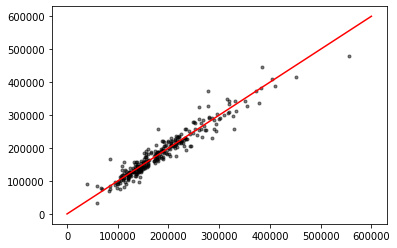

In [53]:
plt.plot(y_test, y_pred, 'k.', alpha=0.5)
plt.plot(x_line, y_line, 'r-')

plt.show()

In [70]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # FIT MODEL TRAINING
    model.fit(X_train, y_train)
    
    # GET METRICS
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f'MAE:  ${round(mae, 2)}')
    print(f'RMSE: ${round(rmse, 2)}')
    
    # PLOT PREDICTIONS VS TARGET
    plt.figure(figsize=(12,8), dpi=200)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='black')
    plt.xlabel('Target Value')
    plt.ylabel('Predicted Value')
    
    # PLOT THE PERFECT RELATIONSHIP LINE
    x_line = [np.min(y_test), np.max(y_test)]
    y_line = [np.min(y_test), np.max(y_test)]
    plt.plot(x_line, y_line, 'r-')
    plt.show()

In [58]:
from sklearn.linear_model import LinearRegression

MAE:  $14584.74
RMSE: $20858.43


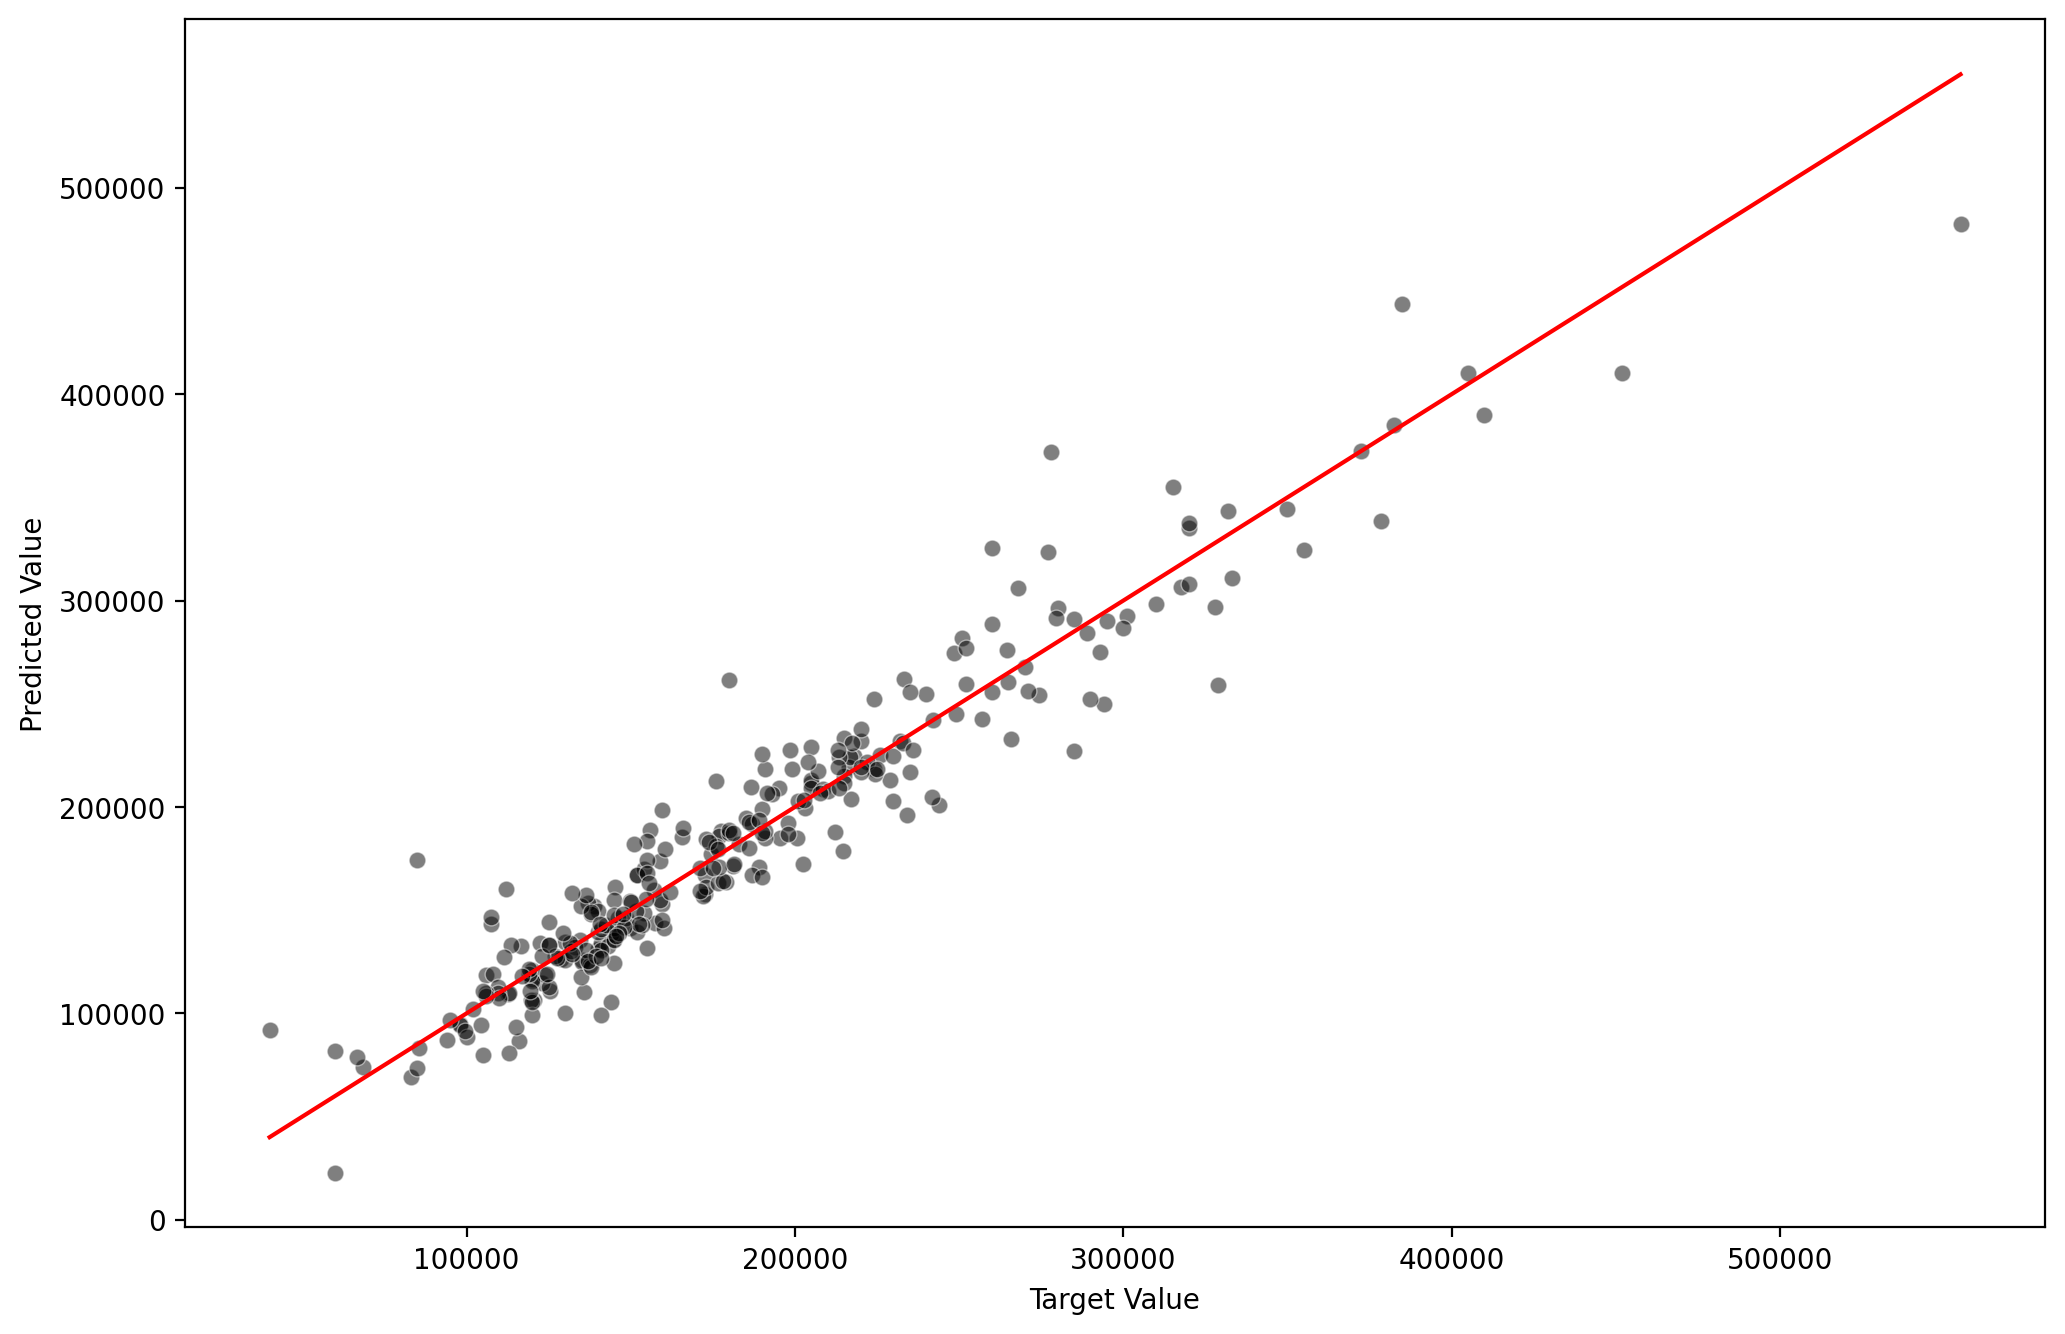

In [73]:
lin_model = LinearRegression()
run_model(lin_model, X_train, y_train, X_test, y_test)

### Polynomial Regression

In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

MAE:  $14584.74
RMSE: $20858.43


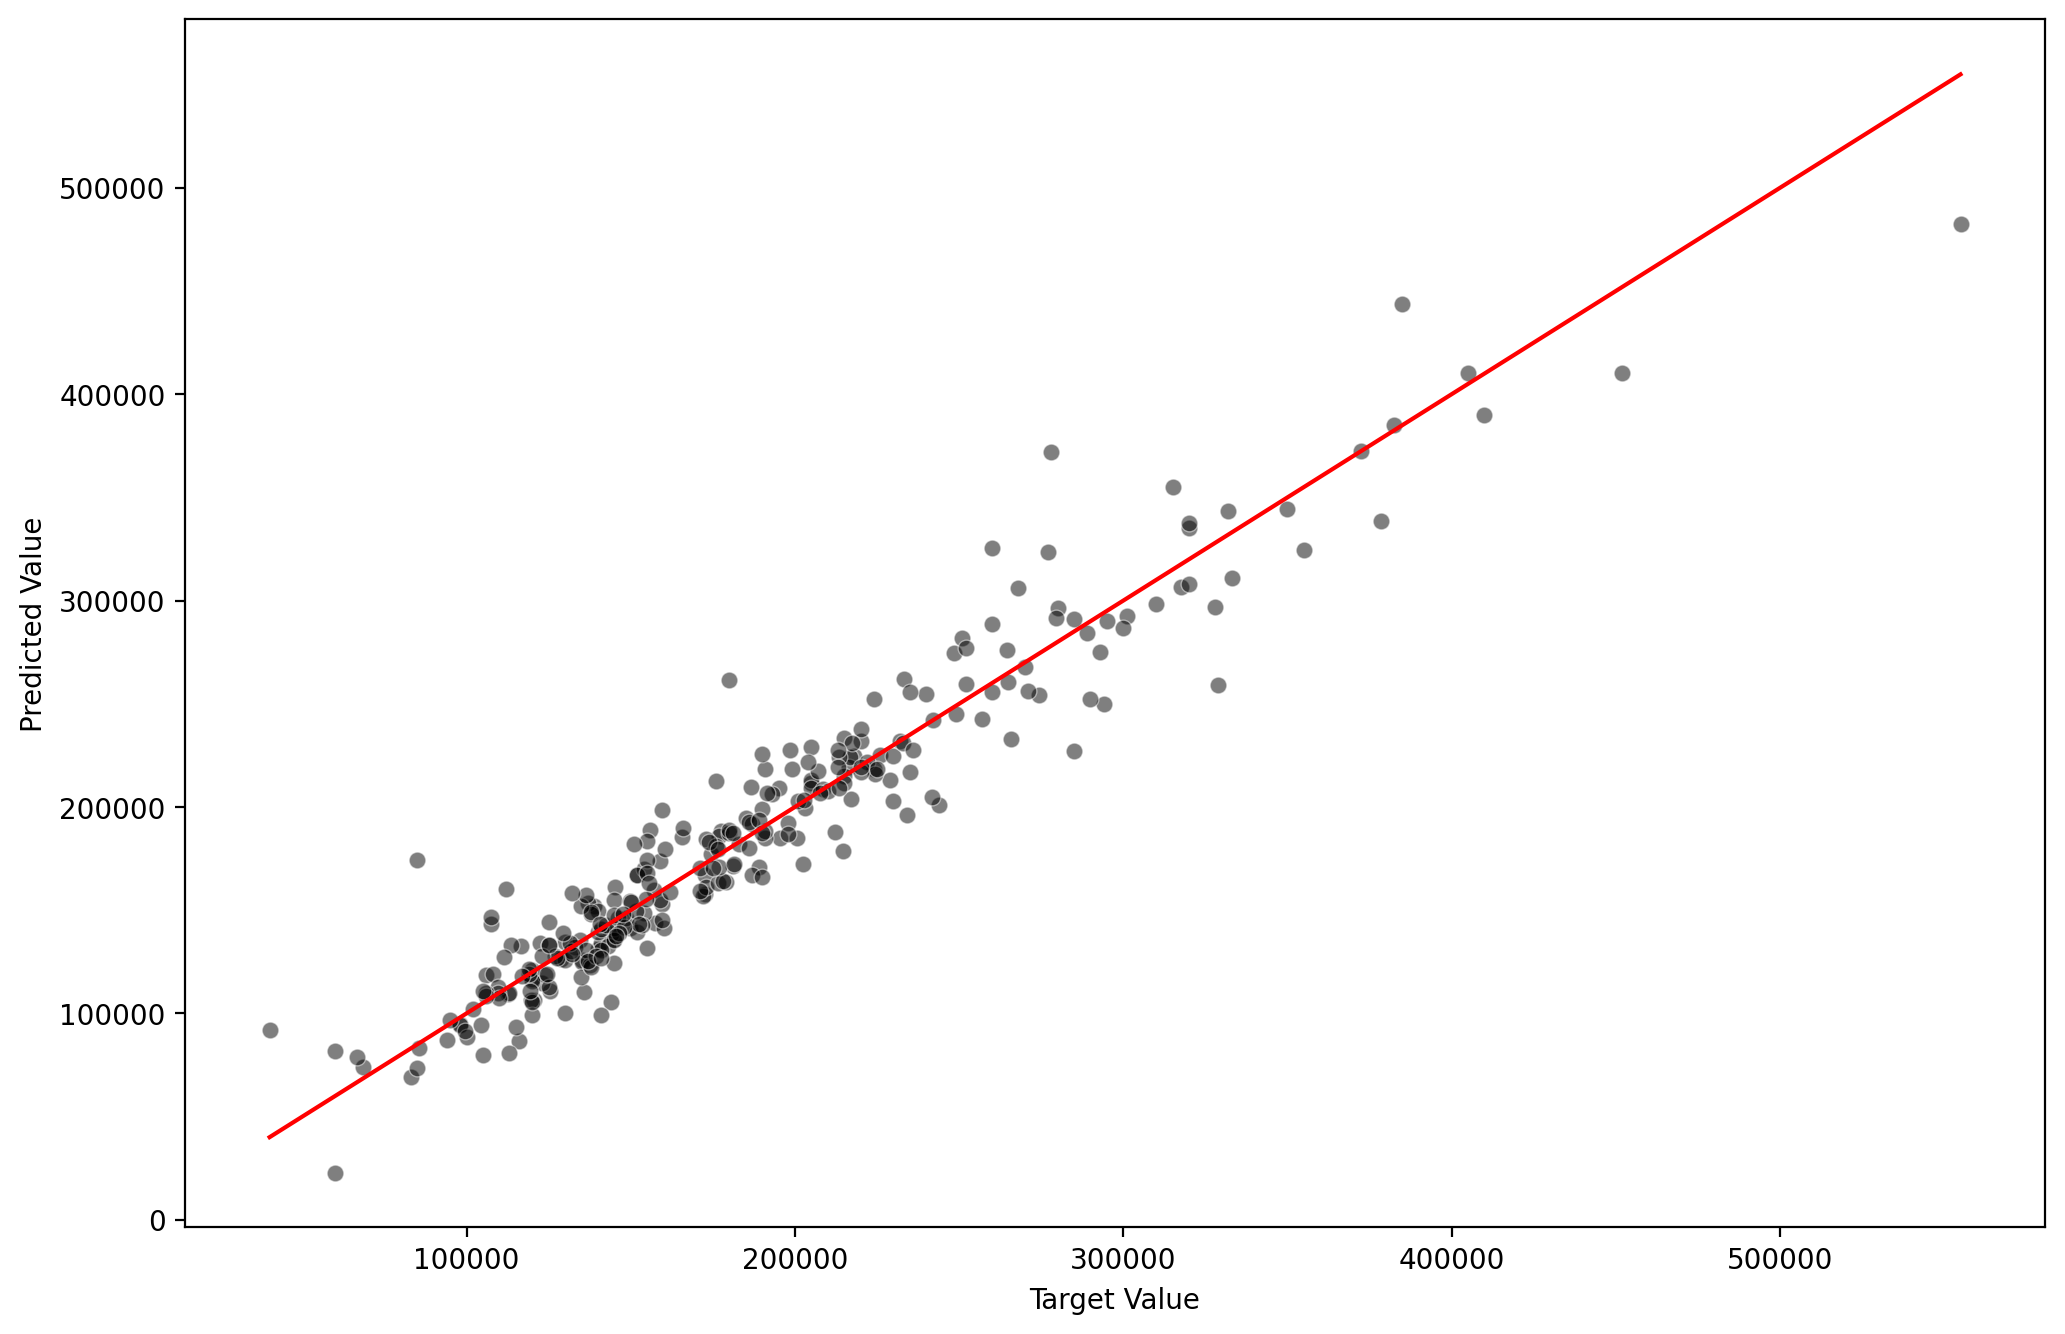

In [76]:
poly_model = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
run_model(poly_model, X_train, y_train, X_test, y_test)

MAE:  $231755.2
RMSE: $840430.58


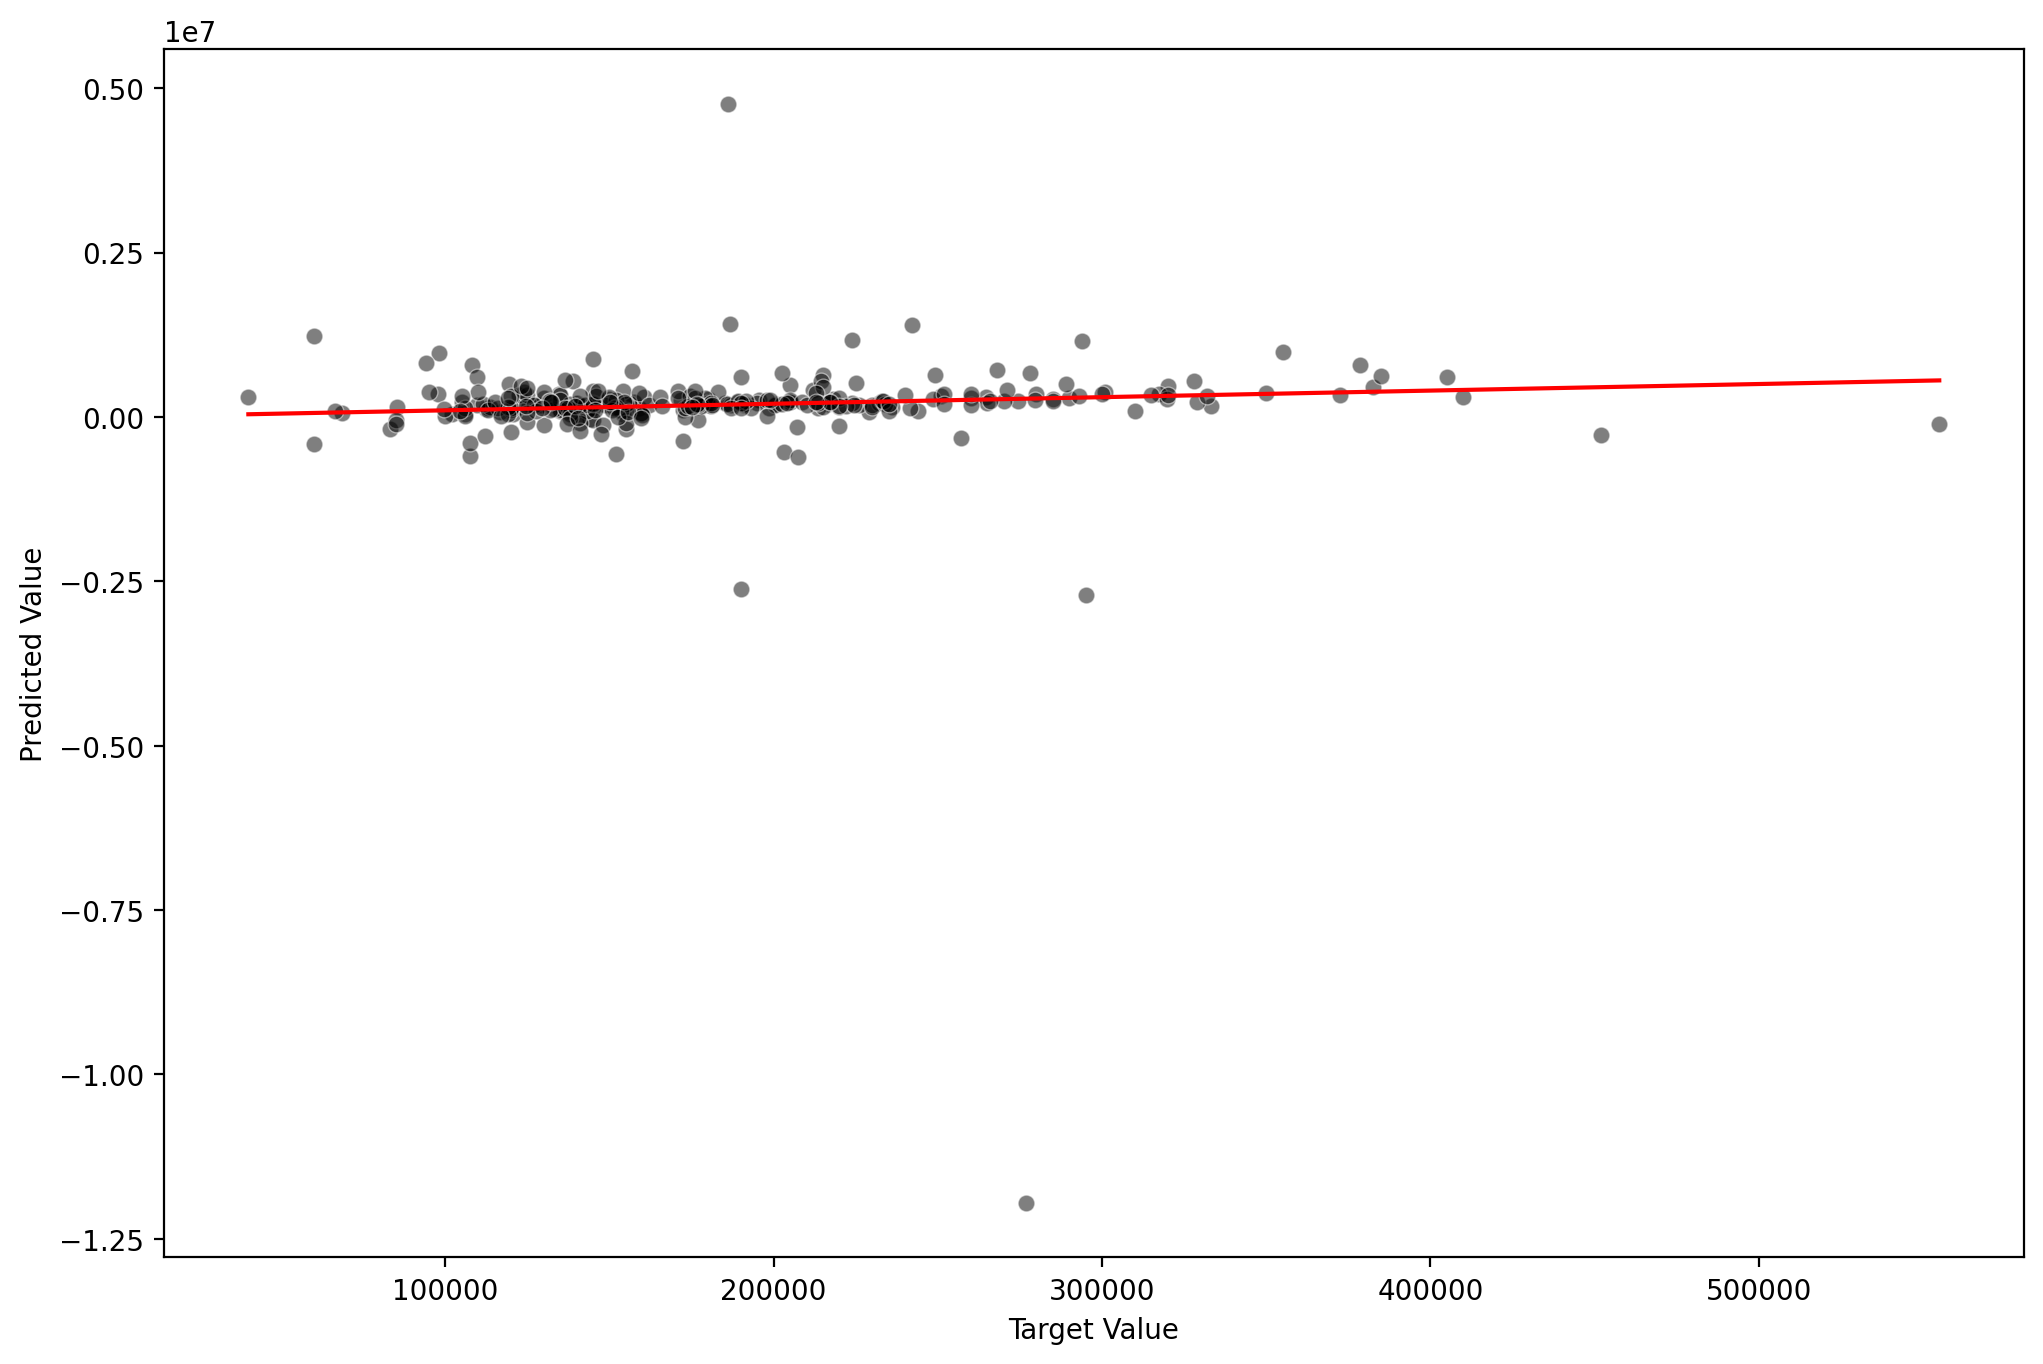

In [77]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
run_model(poly_model, X_train, y_train, X_test, y_test)

### Random Forests

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
rf_model = RandomForestRegressor()

In [82]:
N = len(df.columns)

print(N/3, np.sqrt(N))

91.33333333333333 16.55294535724685


In [94]:
# n_estimators = [64, 100, 128, 200]
# max_features = [4, 8, 16, 32, 64, 128]

n_estimators = [128, 200, 256]
max_features = [32, 64, 128]

In [95]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features}

In [96]:
rf_grid = GridSearchCV(rf_model, param_grid)

In [97]:
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': [32, 64, 128],
                         'n_estimators': [128, 200, 256]})

In [98]:
rf_grid.best_estimator_

RandomForestRegressor(max_features=64, n_estimators=128)

In [99]:
rf_pred = rf_grid.predict(X_test)
mae = mean_absolute_error(y_test, rf_pred)
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(mae)
print(rmse)

14786.44374822241
21048.697260534707


In [100]:
# percent error
print("MAE:", round( 100 * (mae / mean_price), 2), "%" )
print("RMSE:", round( 100 * (rmse / mean_price), 2), "%" )

MAE: 8.18 %
RMSE: 11.64 %
